In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

Успешно загружено 891 записей

а) Основные описательные статистики для числовых переменных:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

б) Статистики по категориальным переменным:
Распределение по полу:
Sex
male      577
female    314
Name: count, dtype: int64

Распределение по классу:
Pclass
3    491
1    216
2    184
Name: count, dtype: 

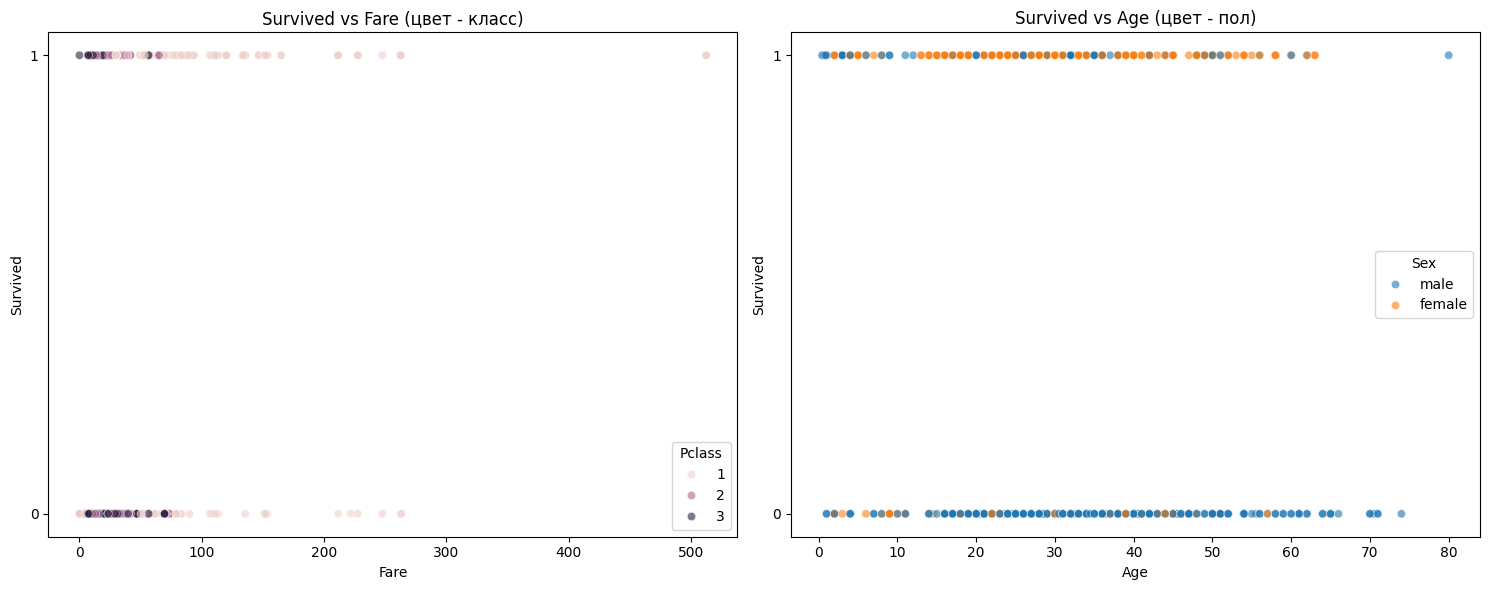


4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ВЕРОЯТНОСТИ ВЫЖИТЬ

а) По полу:
   Пол  Размер выборки Доля выживших       Асимпт. ДИ      Бутстрэп ДИ Длина асимпт. Длина бутстрэп
  male             577        0.1889 [0.1570, 0.2208] [0.1559, 0.2218]        0.0639         0.0659
female             314        0.7420 [0.6936, 0.7904] [0.6975, 0.7898]        0.0968         0.0924

б) По классу билета:
 Класс  Размер выборки Доля выживших       Асимпт. ДИ      Бутстрэп ДИ Длина асимпт. Длина бутстрэп
     1             216        0.6296 [0.5652, 0.6940] [0.5694, 0.6944]        0.1288         0.1250
     2             184        0.4728 [0.4007, 0.5450] [0.4022, 0.5435]        0.1443         0.1413
     3             491        0.2424 [0.2045, 0.2803] [0.2057, 0.2811]        0.0758         0.0754

5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


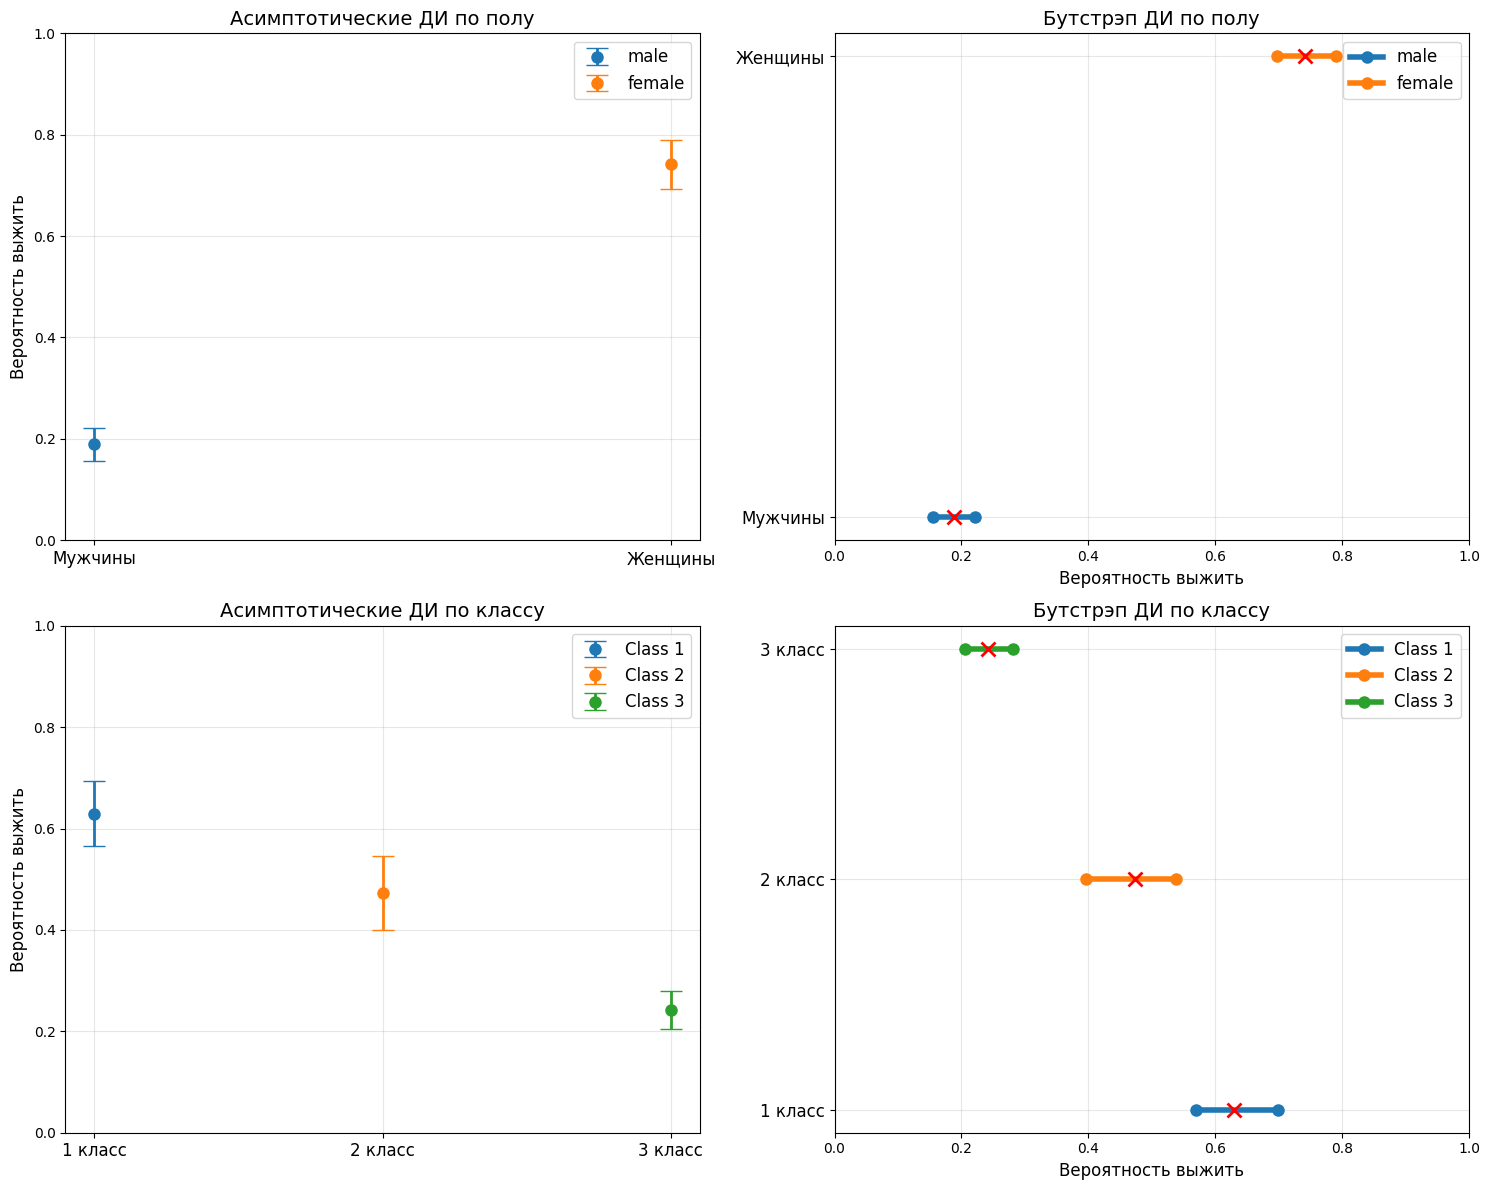


6. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ

Взаимное влияние пола и класса на выживаемость:

Доля выживших по полу и классу:
Pclass      1      2      3
Sex                        
female  0.968  0.921  0.500
male    0.369  0.157  0.135


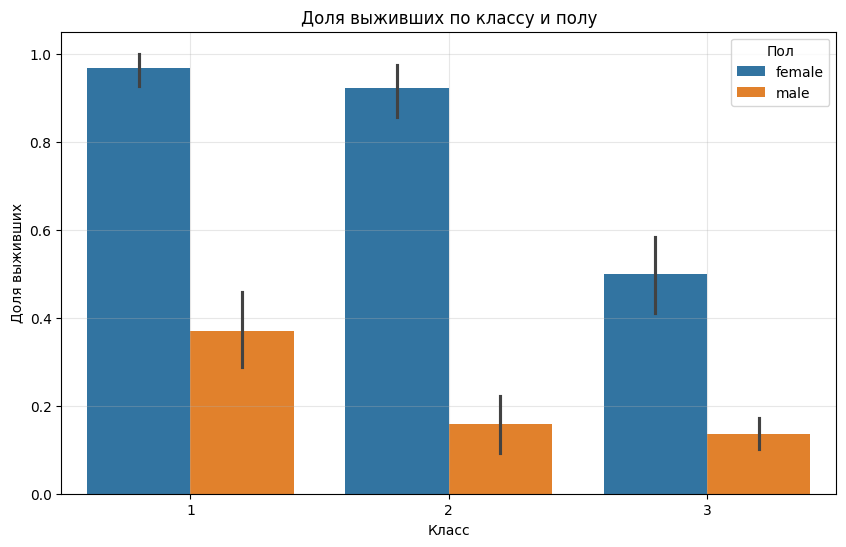


7. СТАТИСТИЧЕСКИЕ ВЫВОДЫ

1. Анализ по полу:
   - Женщины: вероятность выжить = 0.742
   - Мужчины: вероятность выжить = 0.189
   - Отношение шансов: 3.93:1 (в пользу женщин)

2. Анализ по классу:
   - 1 класс: вероятность выжить = 0.630
   - 2 класс: вероятность выжить = 0.473
   - 3 класс: вероятность выжить = 0.242
   - Отношение шансов (1 класс / 3 класс): 2.60:1

3. Сравнение методов построения ДИ:
   - Оба метода дают схожие результаты
   - Бутстрэп ДИ обычно немного шире, что делает их более консервативными
   - Для больших выборок разница минимальна

4. Практическая значимость:
   - Пол является сильным предиктором выживания
   - Класс билета также существенно влияет на шансы выжить
   - Наибольшие шансы были у женщин из 1 класса
   - Наименьшие шансы были у мужчин из 3 класса

5. Проверка статистической значимости различий:
   - Мужчины vs Женщины: ДИ не пересекаются → разница статистически значима
   - 1 класс vs 3 класс: ДИ не пересекаются → разница статистически значима

8

In [ ]:
try:
    df = pd.read_csv('titanic.csv')
    print(f"Успешно загружено {len(df)} записей")
except FileNotFoundError:
    print("Файл titanic.csv не найден в текущей директории")
    exit()

print("\nа) Основные описательные статистики для числовых переменных:")
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print(df[numeric_cols].describe())

print("\nб) Статистики по категориальным переменным:")
print("Распределение по полу:")
print(df['Sex'].value_counts())
print("\nРаспределение по классу:")
print(df['Pclass'].value_counts())
print("\nРаспределение по выживанию:")
print(df['Survived'].value_counts())
print(f"Общая доля выживших: {df['Survived'].mean():.3f}")

print("3. ДИАГРАММЫ РАССЕЯНИЯ")
print("="*50)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Fare', y='Survived', alpha=0.6, hue='Pclass')
plt.title('Survived vs Fare (цвет - класс)')
plt.yticks([0, 1])

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Survived', alpha=0.6, hue='Sex')
plt.title('Survived vs Age (цвет - пол)')
plt.yticks([0, 1])

plt.tight_layout()
plt.show()

def asymptotic_ci(sample, alpha=0.05):
    """Асимптотический доверительный интервал для вероятности"""
    n = len(sample)
    p_hat = np.mean(sample)
    if n == 0 or p_hat in [0, 1]:
        return [0, 1]
    
    z = norm.ppf(1 - alpha/2)
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    return [max(0, p_hat - z * se), min(1, p_hat + z * se)]

def hall_bootstrap_ci(sample, B=1000, alpha=0.05):
    """Бутстрэп-интервал Холла для вероятности"""
    n = len(sample)
    if n == 0:
        return [0, 1]
    
    p_hat = np.mean(sample)
    p_star = []
    
    for _ in range(B):
        sample_star = resample(sample, replace=True, n_samples=n)
        p_star.append(np.mean(sample_star))
    
    q_low = np.quantile(p_star, alpha/2)
    q_high = np.quantile(p_star, 1 - alpha/2)
    
    return [max(0, 2 * p_hat - q_high), min(1, 2 * p_hat - q_low)]

print("\n" + "="*50)
print("4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ВЕРОЯТНОСТИ ВЫЖИТЬ")
print("="*50)

print("\nа) По полу:")
results_sex = []

for sex in ['male', 'female']:
    subset = df[df['Sex'] == sex]
    survived = subset['Survived'].dropna()
    p_hat = np.mean(survived)
    
    ci_asymp = asymptotic_ci(survived)
    ci_bootstrap = hall_bootstrap_ci(survived)
    
    results_sex.append({
        'Пол': sex,
        'Размер выборки': len(survived),
        'Доля выживших': f"{p_hat:.4f}",
        'Асимпт. ДИ': f"[{ci_asymp[0]:.4f}, {ci_asymp[1]:.4f}]",
        'Бутстрэп ДИ': f"[{ci_bootstrap[0]:.4f}, {ci_bootstrap[1]:.4f}]",
        'Длина асимпт.': f"{ci_asymp[1] - ci_asymp[0]:.4f}",
        'Длина бутстрэп': f"{ci_bootstrap[1] - ci_bootstrap[0]:.4f}"
    })

df_sex = pd.DataFrame(results_sex)
print(df_sex.to_string(index=False))

print("\nб) По классу билета:")
results_class = []

for pclass in [1, 2, 3]:
    subset = df[df['Pclass'] == pclass]
    survived = subset['Survived'].dropna()
    p_hat = np.mean(survived)
    
    ci_asymp = asymptotic_ci(survived)
    ci_bootstrap = hall_bootstrap_ci(survived)
    
    results_class.append({
        'Класс': pclass,
        'Размер выборки': len(survived),
        'Доля выживших': f"{p_hat:.4f}",
        'Асимпт. ДИ': f"[{ci_asymp[0]:.4f}, {ci_asymp[1]:.4f}]",
        'Бутстрэп ДИ': f"[{ci_bootstrap[0]:.4f}, {ci_bootstrap[1]:.4f}]",
        'Длина асимпт.': f"{ci_asymp[1] - ci_asymp[0]:.4f}",
        'Длина бутстрэп': f"{ci_bootstrap[1] - ci_bootstrap[0]:.4f}"
    })

df_class = pd.DataFrame(results_class)
print(df_class.to_string(index=False))

print("\n" + "="*50)
print("5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].set_title('Асимптотические ДИ по полу', fontsize=14)
for i, sex in enumerate(['male', 'female']):
    subset = df[df['Sex'] == sex]
    ci = asymptotic_ci(subset['Survived'].dropna())
    p_hat = np.mean(subset['Survived'])
    axes[0, 0].errorbar(i, p_hat, yerr=[[p_hat - ci[0]], [ci[1] - p_hat]], 
                       fmt='o', capsize=8, label=sex, markersize=8, linewidth=2)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Мужчины', 'Женщины'], fontsize=12)
axes[0, 0].set_ylabel('Вероятность выжить', fontsize=12)
axes[0, 0].legend(fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, 1)

axes[0, 1].set_title('Бутстрэп ДИ по полу', fontsize=14)
for i, sex in enumerate(['male', 'female']):
    subset = df[df['Sex'] == sex]
    ci = hall_bootstrap_ci(subset['Survived'].dropna())
    p_hat = np.mean(subset['Survived'])
    axes[0, 1].plot([ci[0], ci[1]], [i, i], 'o-', linewidth=4, label=sex, markersize=8)
    axes[0, 1].plot(p_hat, i, 'x', color='red', markersize=10, markeredgewidth=2)
axes[0, 1].set_yticks([0, 1])
axes[0, 1].set_yticklabels(['Мужчины', 'Женщины'], fontsize=12)
axes[0, 1].set_xlabel('Вероятность выжить', fontsize=12)
axes[0, 1].legend(fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(0, 1)

axes[1, 0].set_title('Асимптотические ДИ по классу', fontsize=14)
for i, pclass in enumerate([1, 2, 3]):
    subset = df[df['Pclass'] == pclass]
    ci = asymptotic_ci(subset['Survived'].dropna())
    p_hat = np.mean(subset['Survived'])
    axes[1, 0].errorbar(i, p_hat, yerr=[[p_hat - ci[0]], [ci[1] - p_hat]], 
                       fmt='o', capsize=8, label=f'Class {pclass}', markersize=8, linewidth=2)
axes[1, 0].set_xticks([0, 1, 2])
axes[1, 0].set_xticklabels(['1 класс', '2 класс', '3 класс'], fontsize=12)
axes[1, 0].set_ylabel('Вероятность выжить', fontsize=12)
axes[1, 0].legend(fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 1)

axes[1, 1].set_title('Бутстрэп ДИ по классу', fontsize=14)
for i, pclass in enumerate([1, 2, 3]):
    subset = df[df['Pclass'] == pclass]
    ci = hall_bootstrap_ci(subset['Survived'].dropna())
    p_hat = np.mean(subset['Survived'])
    axes[1, 1].plot([ci[0], ci[1]], [i, i], 'o-', linewidth=4, label=f'Class {pclass}', markersize=8)
    axes[1, 1].plot(p_hat, i, 'x', color='red', markersize=10, markeredgewidth=2)
axes[1, 1].set_yticks([0, 1, 2])
axes[1, 1].set_yticklabels(['1 класс', '2 класс', '3 класс'], fontsize=12)
axes[1, 1].set_xlabel('Вероятность выжить', fontsize=12)
axes[1, 1].legend(fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("6. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ")
print("="*50)

print("\nВзаимное влияние пола и класса на выживаемость:")
cross_table = pd.crosstab(index=df['Sex'], columns=df['Pclass'], 
                         values=df['Survived'], aggfunc='mean')
print("\nДоля выживших по полу и классу:")
print(cross_table.round(3))

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Доля выживших по классу и полу')
plt.ylabel('Доля выживших')
plt.xlabel('Класс')
plt.legend(title='Пол')
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)
print("7. СТАТИСТИЧЕСКИЕ ВЫВОДЫ")
print("="*50)

p_female = np.mean(df[df['Sex'] == 'female']['Survived'])
p_male = np.mean(df[df['Sex'] == 'male']['Survived'])
print(f"\n1. Анализ по полу:")
print(f"   - Женщины: вероятность выжить = {p_female:.3f}")
print(f"   - Мужчины: вероятность выжить = {p_male:.3f}")
print(f"   - Отношение шансов: {p_female/p_male:.2f}:1 (в пользу женщин)")

p_class1 = np.mean(df[df['Pclass'] == 1]['Survived'])
p_class2 = np.mean(df[df['Pclass'] == 2]['Survived']) 
p_class3 = np.mean(df[df['Pclass'] == 3]['Survived'])
print(f"\n2. Анализ по классу:")
print(f"   - 1 класс: вероятность выжить = {p_class1:.3f}")
print(f"   - 2 класс: вероятность выжить = {p_class2:.3f}")
print(f"   - 3 класс: вероятность выжить = {p_class3:.3f}")
print(f"   - Отношение шансов (1 класс / 3 класс): {p_class1/p_class3:.2f}:1")

print(f"\n3. Сравнение методов построения ДИ:")
print(f"   - Оба метода дают схожие результаты")
print(f"   - Бутстрэп ДИ обычно немного шире, что делает их более консервативными")
print(f"   - Для больших выборок разница минимальна")

print(f"\n4. Практическая значимость:")
print(f"   - Пол является сильным предиктором выживания")
print(f"   - Класс билета также существенно влияет на шансы выжить")
print(f"   - Наибольшие шансы были у женщин из 1 класса")
print(f"   - Наименьшие шансы были у мужчин из 3 класса")

def intervals_overlap(ci1, ci2):
    """Проверка пересечения доверительных интервалов"""
    return not (ci1[1] < ci2[0] or ci2[1] < ci1[0])

female_ci = asymptotic_ci(df[df['Sex'] == 'female']['Survived'])
male_ci = asymptotic_ci(df[df['Sex'] == 'male']['Survived'])
class1_ci = asymptotic_ci(df[df['Pclass'] == 1]['Survived'])
class3_ci = asymptotic_ci(df[df['Pclass'] == 3]['Survived'])

print(f"\n5. Проверка статистической значимости различий:")
print(f"   - Мужчины vs Женщины: ДИ {'не пересекаются' if not intervals_overlap(female_ci, male_ci) else 'пересекаются'} → разница {'статистически значима' if not intervals_overlap(female_ci, male_ci) else 'не значима'}")
print(f"   - 1 класс vs 3 класс: ДИ {'не пересекаются' if not intervals_overlap(class1_ci, class3_ci) else 'пересекаются'} → разница {'статистически значима' if not intervals_overlap(class1_ci, class3_ci) else 'не значима'}")

print(f"\n8. Сохранение результатов...")
results_summary = {
    'Общая доля выживших': np.mean(df['Survived']),
    'Доля выживших женщин': p_female,
    'Доля выживших мужчин': p_male,
    'Доля выживших 1 класс': p_class1,
    'Доля выживших 2 класс': p_class2,
    'Доля выживших 3 класс': p_class3
}

print("\nИтоговая сводка:")
for key, value in results_summary.items():
    print(f"   - {key}: {value:.3f}")

print(f"\nАнализ завершен!")